# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Импорт датасета

In [2]:
df = pd.read_csv('2021_Russian_data.csv')

In [3]:
df.head()

SUBJECT  YEAR  REGION  DATA_AVAILABLE WINNERS_ONLY  \
0  русский язык  2021  Адыгея            True        False   
1  русский язык  2021  Адыгея            True        False   
2  русский язык  2021  Адыгея            True        False   
3  русский язык  2021  Адыгея            True        False   
4  русский язык  2021  Адыгея            True        False   

   GRADE_OF_COMPETITION   ID CODE                 DISTRICT          SCHOOL  \
0                   9.0  1.0  NaN             Город Майкоп  Гимназия No 22   
1                   9.0  2.0  NaN      Кошехабльский район        СОШ No 8   
2                   9.0  3.0  NaN         Гиагинский район        СОШ No 4   
3                   9.0  4.0  NaN  Красногвардейский район   Гимназия No 1   
4                   9.0  5.0  NaN  Красногвардейский район        СОШ No 2   

   ...   T7   T8   SUM  PERCENTAGE  REGIONAL_STATUS  AUTHENTIC  FINAL_SUM  \
0  ...  2.0  3.5  23.5        26.1              NaN        оба        NaN   
1  ...  2.0  1.5  20.0        22.2              NaN        оба        NaN   
2  ...  3.0  1.0  18.5        20.6              NaN        оба        NaN   
3  ...  0.0  1.5  18.0        20.0              NaN        оба        NaN   
4  ...  0.0  1.0  16.0        17.8              NaN        оба        NaN   

   FINAL_PERCENTAGE  FINAL_STATUS  COMMENT  
0               NaN           NaN      NaN  
1               NaN           NaN      NaN  
2               NaN           NaN      NaN  
3               NaN           NaN      NaN  
4               NaN           NaN      NaN  

[5 rows x 26 columns]

# Описание датасета
SUBJECT: школьный предмет

YEAR: год состязания

REGION: регион России (включая аннексированные Республику Крым и Севастополь)

DATA_AVAILABLE: имеются ли данные для региона. Данные считались имеющимися, если хотя бы для победителей и призёров регионального этапа известны результаты в баллах или в процентах от теоретического максимума, а не только статусы победителя, призёра и т. п.

WINNERS_ONLY: представлены ли данные только для участников, получивших дипломы, или для всех участников регионального этапа в данном регионе. NB: для Свердловской области данные в принятом нами смысле имеются только для победителей, однако призёры включены в датасет; выбрано значение TRUE

GRADE_OF_COMPETITION: класс, задания для которого выполнял участник (9, 10 или 11)

ID: уникальный идентификатор участника (выбран произвольно)

CODE: шифр участника на региональном этапе

DISTRICT: район, город, муниципальное образование и т. д., к которому относится школа участника

SCHOOL: школа, за которую выступает участник

T1–T8: оценки участника в баллах за задания 1–8 регионального этапа. Несравнимы между классами!

SUM: сумма баллов участника за все задания регионального этапа. Теоретическая максимально возможная сумма в 2021 году для 9 класса составляла 90 баллов, для 10 класса — 100 баллов, для 11 класса — 110 баллов; в 2022 году для 9 класса — 88 баллов, для 10 класса — 100 баллов, для 11 класса — 112 баллов

PERCENTAGE: процент, который сумма баллов участника на региональном этапе составляет от теоретического максимума

REGIONAL_STATUS: категория, к которой участник отнесён по итогам регионального этапа. Основными являются Победитель, Призер, Участник, а также пустая категория, по смыслу совпадающая со статусом Участника. Отнесение следует различным правилам в разных регионах, поэтому в общем случае статусы плохо сравнимы между регионами (для отбора на заключительный этап используются не они, а единый для страны проходной балл)
AUTHENTIC: какое из значений полей SUM и PERCENTAGE представлено в исходных данных, а какое вычислено при создании датасета. В случаях, когда исходным был процент выполнения (и тем более отсутствовали результаты проверки отдельных заданий), суммы несистематически приводились к разрешённому правилами шагу в 0,5 балла

FINAL_SUM: сумма баллов участника на заключительном этапе. Теоретическая максимально возможная сумма в 2021 году для 9 класса составляла 150 баллов, для 10 класса — 165 баллов, для 11 класса — 180 баллов

FINAL_PERCENTAGE: процент, который сумма баллов участника на заключительном этапе составляет от теоретического максимума

FINAL_STATUS: категория, к которой участник отнесён по итогам заключительного этапа. Возможные значения: Победитель, Призер, Участник

COMMENT: неформальный комментарий

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBJECT               12515 non-null  object 
 1   YEAR                  12515 non-null  int64  
 2   REGION                12515 non-null  object 
 3   DATA_AVAILABLE        12515 non-null  bool   
 4   WINNERS_ONLY          12507 non-null  object 
 5   GRADE_OF_COMPETITION  12507 non-null  float64
 6   ID                    12507 non-null  float64
 7   CODE                  3730 non-null   object 
 8   DISTRICT              5918 non-null   object 
 9   SCHOOL                3529 non-null   object 
 10  T1                    3552 non-null   float64
 11  T2                    3552 non-null   float64
 12  T3                    3551 non-null   float64
 13  T4                    3551 non-null   float64
 14  T5                    3552 non-null   float64
 15  T6                 

Выводим информацию о датасете и видим очень много пропусков

In [5]:
df.describe()

YEAR  GRADE_OF_COMPETITION            ID           T1           T2  \
count  12515.0          12507.000000  12507.000000  3552.000000  3552.000000   
mean    2021.0              9.990725   6254.000000     5.339527     1.040118   
std        0.0              0.814417   3610.604243     2.205287     1.833082   
min     2021.0              9.000000      1.000000     0.000000     0.000000   
25%     2021.0              9.000000   3127.500000     4.000000     0.000000   
50%     2021.0             10.000000   6254.000000     5.500000     0.000000   
75%     2021.0             11.000000   9380.500000     7.000000     1.000000   
max     2021.0             11.000000  12507.000000    14.000000    13.000000   

                T3           T4           T5           T6           T7  \
count  3551.000000  3551.000000  3552.000000  3552.000000  3552.000000   
mean      3.738243     1.826500     3.615850     2.560670     2.769003   
std       3.088550     2.482066     2.677234     2.145488     2.934381   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     1.500000     0.500000     0.000000   
50%       4.000000     0.000000     3.500000     2.500000     2.000000   
75%       6.000000     3.500000     5.500000     4.500000     5.000000   
max      12.000000    11.500000    16.000000    12.000000    14.000000   

                T8           SUM    PERCENTAGE   FINAL_SUM  FINAL_PERCENTAGE  
count  3550.000000  12352.000000  12351.000000  289.000000        289.000000  
mean      3.668761     26.349743     26.423128   88.989619         53.623571  
std       3.307064     15.517342     15.488333   18.135243          9.969091  
min       0.000000      0.000000      0.000000   27.000000         18.000000  
25%       1.000000     15.000000     15.000000   76.000000         47.333333  
50%       3.000000     24.500000     24.400000   90.000000         54.722222  
75%       5.500000     35.500000     35.900000  101.000000         60.666667  
max      18.500000     96.500000     90.000000  130.500000         75.151515

In [6]:
df.shape

(12515, 26)

Размеры датасета 12515 строк и 26 стобцов

In [7]:
df.isna().sum()

SUBJECT                     0
YEAR                        0
REGION                      0
DATA_AVAILABLE              0
WINNERS_ONLY                8
GRADE_OF_COMPETITION        8
ID                          8
CODE                     8785
DISTRICT                 6597
SCHOOL                   8986
T1                       8963
T2                       8963
T3                       8964
T4                       8964
T5                       8963
T6                       8963
T7                       8963
T8                       8965
SUM                       163
PERCENTAGE                164
REGIONAL_STATUS          2578
AUTHENTIC                 107
FINAL_SUM               12226
FINAL_PERCENTAGE        12226
FINAL_STATUS            12226
COMMENT                 12452
dtype: int64

# Удаление ненужных столбцов

In [8]:
df.drop(columns=['SUBJECT'], inplace=True)
df.drop(columns=['YEAR'], inplace=True)
df.drop(columns=['CODE'], inplace=True)
df.drop(columns=['ID'], inplace=True)
df.drop(columns=['COMMENT'], inplace=True)

Мы и так знаем что в датасете содержится информация о Русском языке 2021 года. CODE и ID совпадают с индексом строки. COMMENT нужен для исправления финального балла он нам не нужен

# Заполнение пропусков

In [9]:
# Заполнение пустых заданий
for i in range(1,9):
    df[f"T{i}"] = df[f"T{i}"].fillna(0)


# Заполнение столбца SUM
df['SUM'] = df.apply(lambda row: sum([row[f'T{i}'] for i in range(1, 9)]) if pd.isnull(row['SUM']) else row['SUM'], axis=1)

# Заполнение процента
max_scores = {
    (9): 90, (10): 100, (11): 110
}

def calculate_percentage(row):
    max_score = max_scores.get((row['GRADE_OF_COMPETITION']), 0)
    if max_score > 0:
        return (row['SUM'] / max_score) * 100
    return None

df['PERCENTAGE'] = df.apply(lambda row: calculate_percentage(row) if pd.isnull(row['PERCENTAGE']) else row['PERCENTAGE'], axis=1)

# Заполнение других столбцов
df['REGIONAL_STATUS'] = df['REGIONAL_STATUS'].fillna('Участник')
df['WINNERS_ONLY'] = df['WINNERS_ONLY'].fillna(df['WINNERS_ONLY'].mode()[0])
df['FINAL_STATUS'] = df['FINAL_STATUS'].fillna('Участник')
df['FINAL_SUM'] = df['FINAL_SUM'].fillna(0)
df['FINAL_PERCENTAGE'] = df['FINAL_PERCENTAGE'].fillna(0)
df['AUTHENTIC'] = df['AUTHENTIC'].fillna(df['AUTHENTIC'].mode()[0])
df['SCHOOL'] = df['SCHOOL'].fillna('Неизвестно')
df['REGION'] = df['REGION'].fillna('Неизвестно')
df['DISTRICT'] = df['DISTRICT'].fillna(df['REGION'])
df['GRADE_OF_COMPETITION'] = df['GRADE_OF_COMPETITION'].fillna(df['GRADE_OF_COMPETITION'].mode()[0])

# Проверяем, есть ли ещё пустые значения
missing_values = df.isnull().sum()
print(missing_values)

REGION                  0
DATA_AVAILABLE          0
WINNERS_ONLY            0
GRADE_OF_COMPETITION    0
DISTRICT                0
SCHOOL                  0
T1                      0
T2                      0
T3                      0
T4                      0
T5                      0
T6                      0
T7                      0
T8                      0
SUM                     0
PERCENTAGE              8
REGIONAL_STATUS         0
AUTHENTIC               0
FINAL_SUM               0
FINAL_PERCENTAGE        0
FINAL_STATUS            0
dtype: int64


### Преобразование типов данных

In [10]:
df['GRADE_OF_COMPETITION'] = df['GRADE_OF_COMPETITION'].astype(int)

In [11]:
df['WINNERS_ONLY'] = df['WINNERS_ONLY'].astype(bool)

In [12]:
ht = df
ht['REGION_NUMERIC'], _ = pd.factorize(ht['REGION'])
ht['SCHOOL_NIMERIC'], _ = pd.factorize(ht['SCHOOL'])
ht['DISTRICT_NUMERIC'], _ = pd.factorize(ht['DISTRICT'])
ht['REGIONAL_STATUS_NUMERIC'], _ = pd.factorize(ht['REGIONAL_STATUS'])
ht['AUTHENTIC_NUMERIC'], _ = pd.factorize(ht['AUTHENTIC'])
ht['FINAL_STATUS_NUMERIC'], _ = pd.factorize(ht['FINAL_STATUS'])

ht.drop(columns=['REGION'], inplace=True)
ht.drop(columns=['SCHOOL'], inplace=True)
ht.drop(columns=['DISTRICT'], inplace=True)
ht.drop(columns=['REGIONAL_STATUS'], inplace=True)
ht.drop(columns=['AUTHENTIC'], inplace=True)
ht.drop(columns=['FINAL_STATUS'], inplace=True)

<Figure size 1000x1000 with 0 Axes>

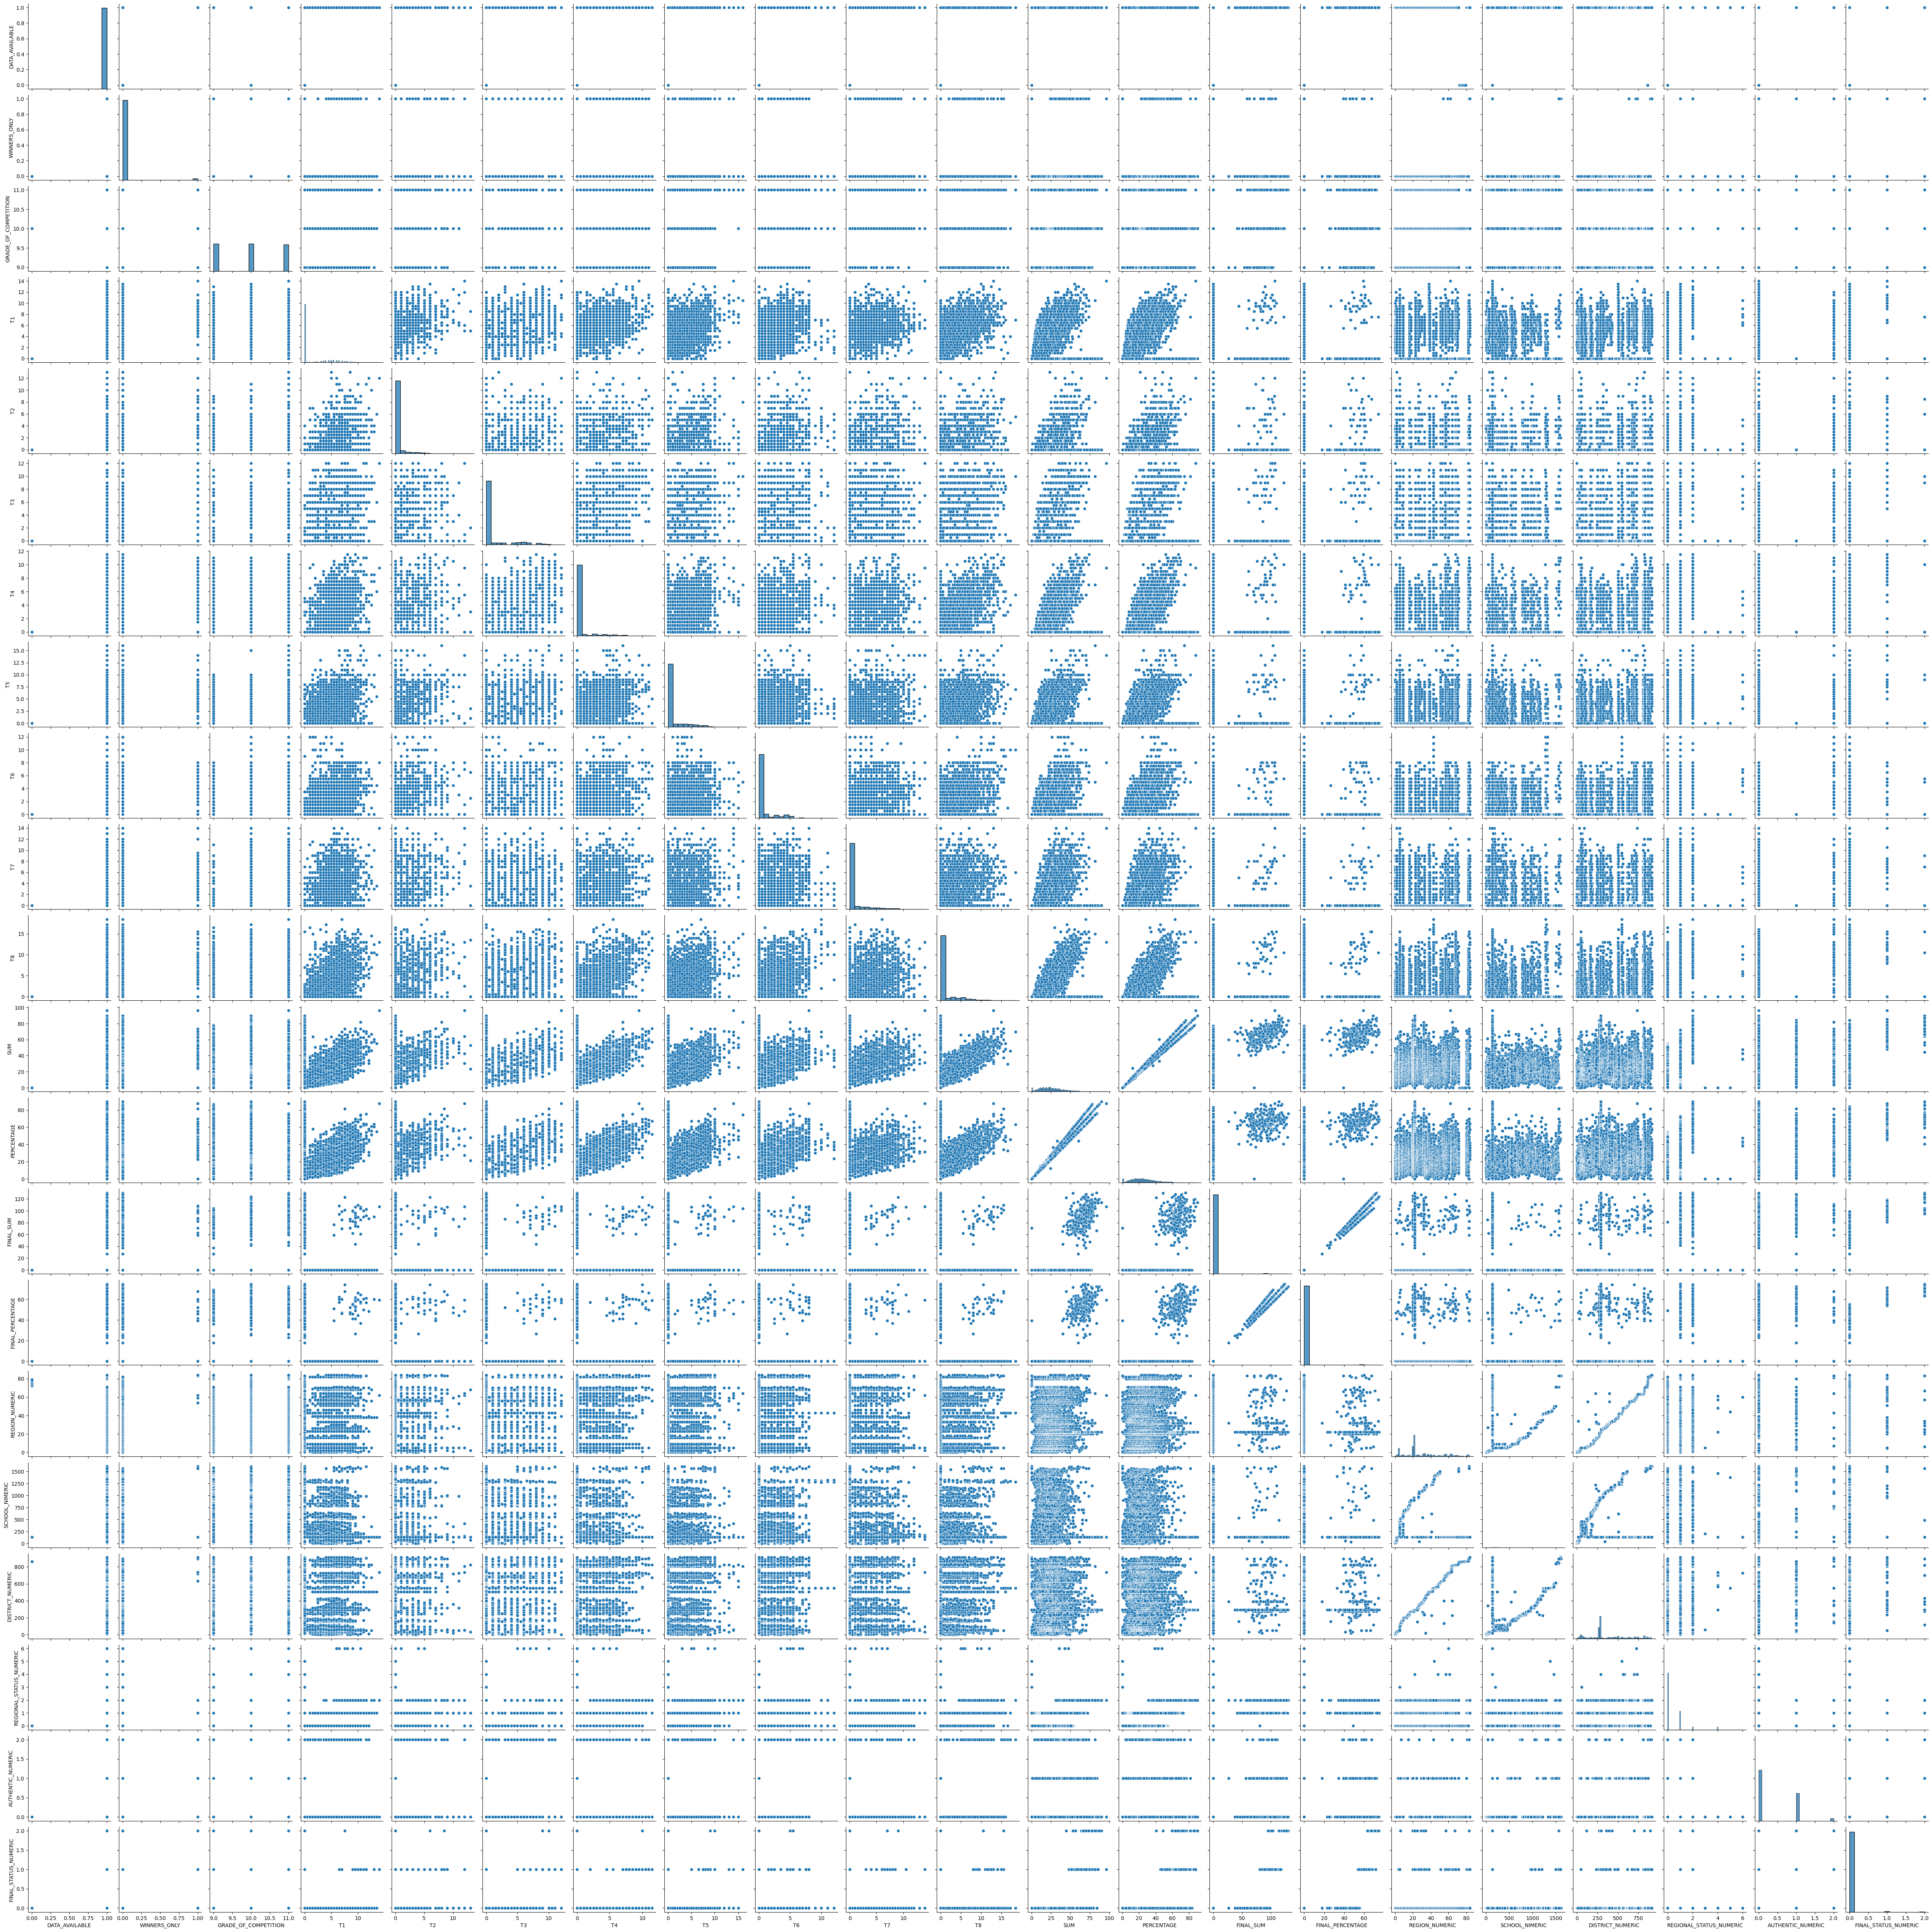

In [13]:
plt.figure(figsize=(10,10))
sns.pairplot(ht)

In [14]:
p1lt.figure(figsize=(15,10))
sns.heatmap(ht.corr(), annot=True, cmap='Reds', fmt='0.2f', vmin=-1)
plt.show

NameError: name 'p1lt' is not defined

In [ ]:
df.duplicated().sum()